<a href="https://colab.research.google.com/github/sreekanthgopinathan/ObesityRiskPrediction/blob/main/ObesityRiskPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 641.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.0/161.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [2]:
import pandas as pd
from autoviz import AutoViz_Class
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import time
import seaborn

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import auc as skl_auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


# Problem 1: Read in the Data

In [5]:
#load the dataset
filepath = '/content/drive/MyDrive/Career/AI ML/Capstone/data/train.csv' # update filepath before running
df = pd.read_csv(filepath)

# Problem 2: Understanding the Data

In [ ]:
#sample the data
df.head()

id  Gender     Age      Height     Weight   family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950               yes                
1   1  Female  18.000000  1.560000   57.000000               yes                
2   2  Female  18.000000  1.711460   50.165754               yes                
3   3  Female  20.952737  1.710730  131.274851               yes                
4   4    Male  31.641081  1.914186   93.798055               yes                

  FAVC    FCVC       NCP       CAEC    SMOKE    CH2O   SCC     FAF    \
0  yes  2.000000  2.983297   Sometimes   no   2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently   no   2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes   no   1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes   no   1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes   no   1.979848  no  1.967973   

      TUE      CALC            MTRANS              NObeyesdad       
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

Description of features below :

variables obtained :
*   Gender,
*   Age,
*   Height
*   Weight.

The attributes related with eating habits are:


*   FAVC : Frequent consumption of high caloric food,
*   FCVC : Frequency of consumption of vegetables,
*   NCP : Number of main meals,
*   CAEC : Consumption of food between meals,
*   CH20 Consumption of water daily, and
*   CALC : Consumption of alcohol.


 The attributes related with the physical condition are:
* SCC : Calories consumption monitoring,
* FAF : Physical activity frequency,
* TUE : Time using technology devices
* MTRANS : Transportation used


 Target variable NObesity values are:

* Underweight Less than 18.5
* Normal_Weight 18.5 to 24.9
* Overweight 25.0 to 29.9
* Obesity I 30.0 to 34.9
* Overweight_Level_II 35.0 to 39.9
* Obesity III Higher than 40

In [ ]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

# Problem 3: Understanding the Features

In [ ]:
# Display descriptive statistics
df.describe()

id            Age         Height        Weight         FCVC      \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

            NCP          CH2O           FAF           TUE      
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

Shape of your Data Set loaded: (20758, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    18 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['id']
To fix these data quality issues in the dataset, import FixD

Number of All Scatter Plots = 36


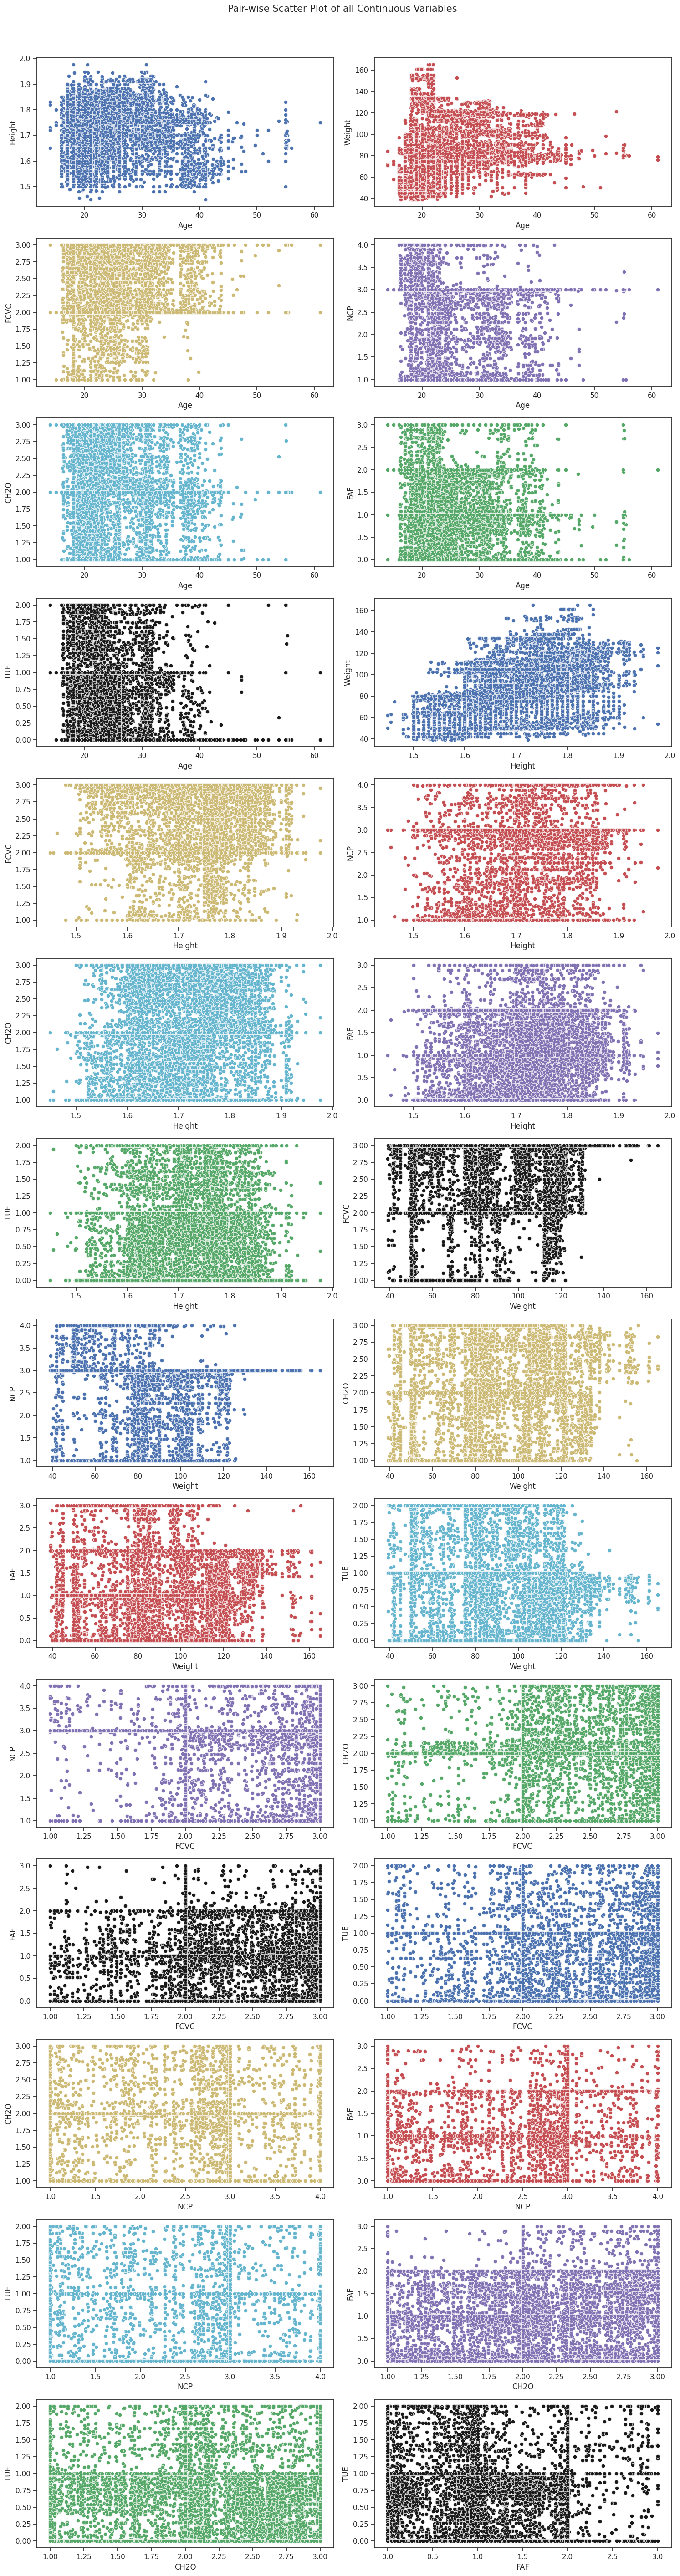

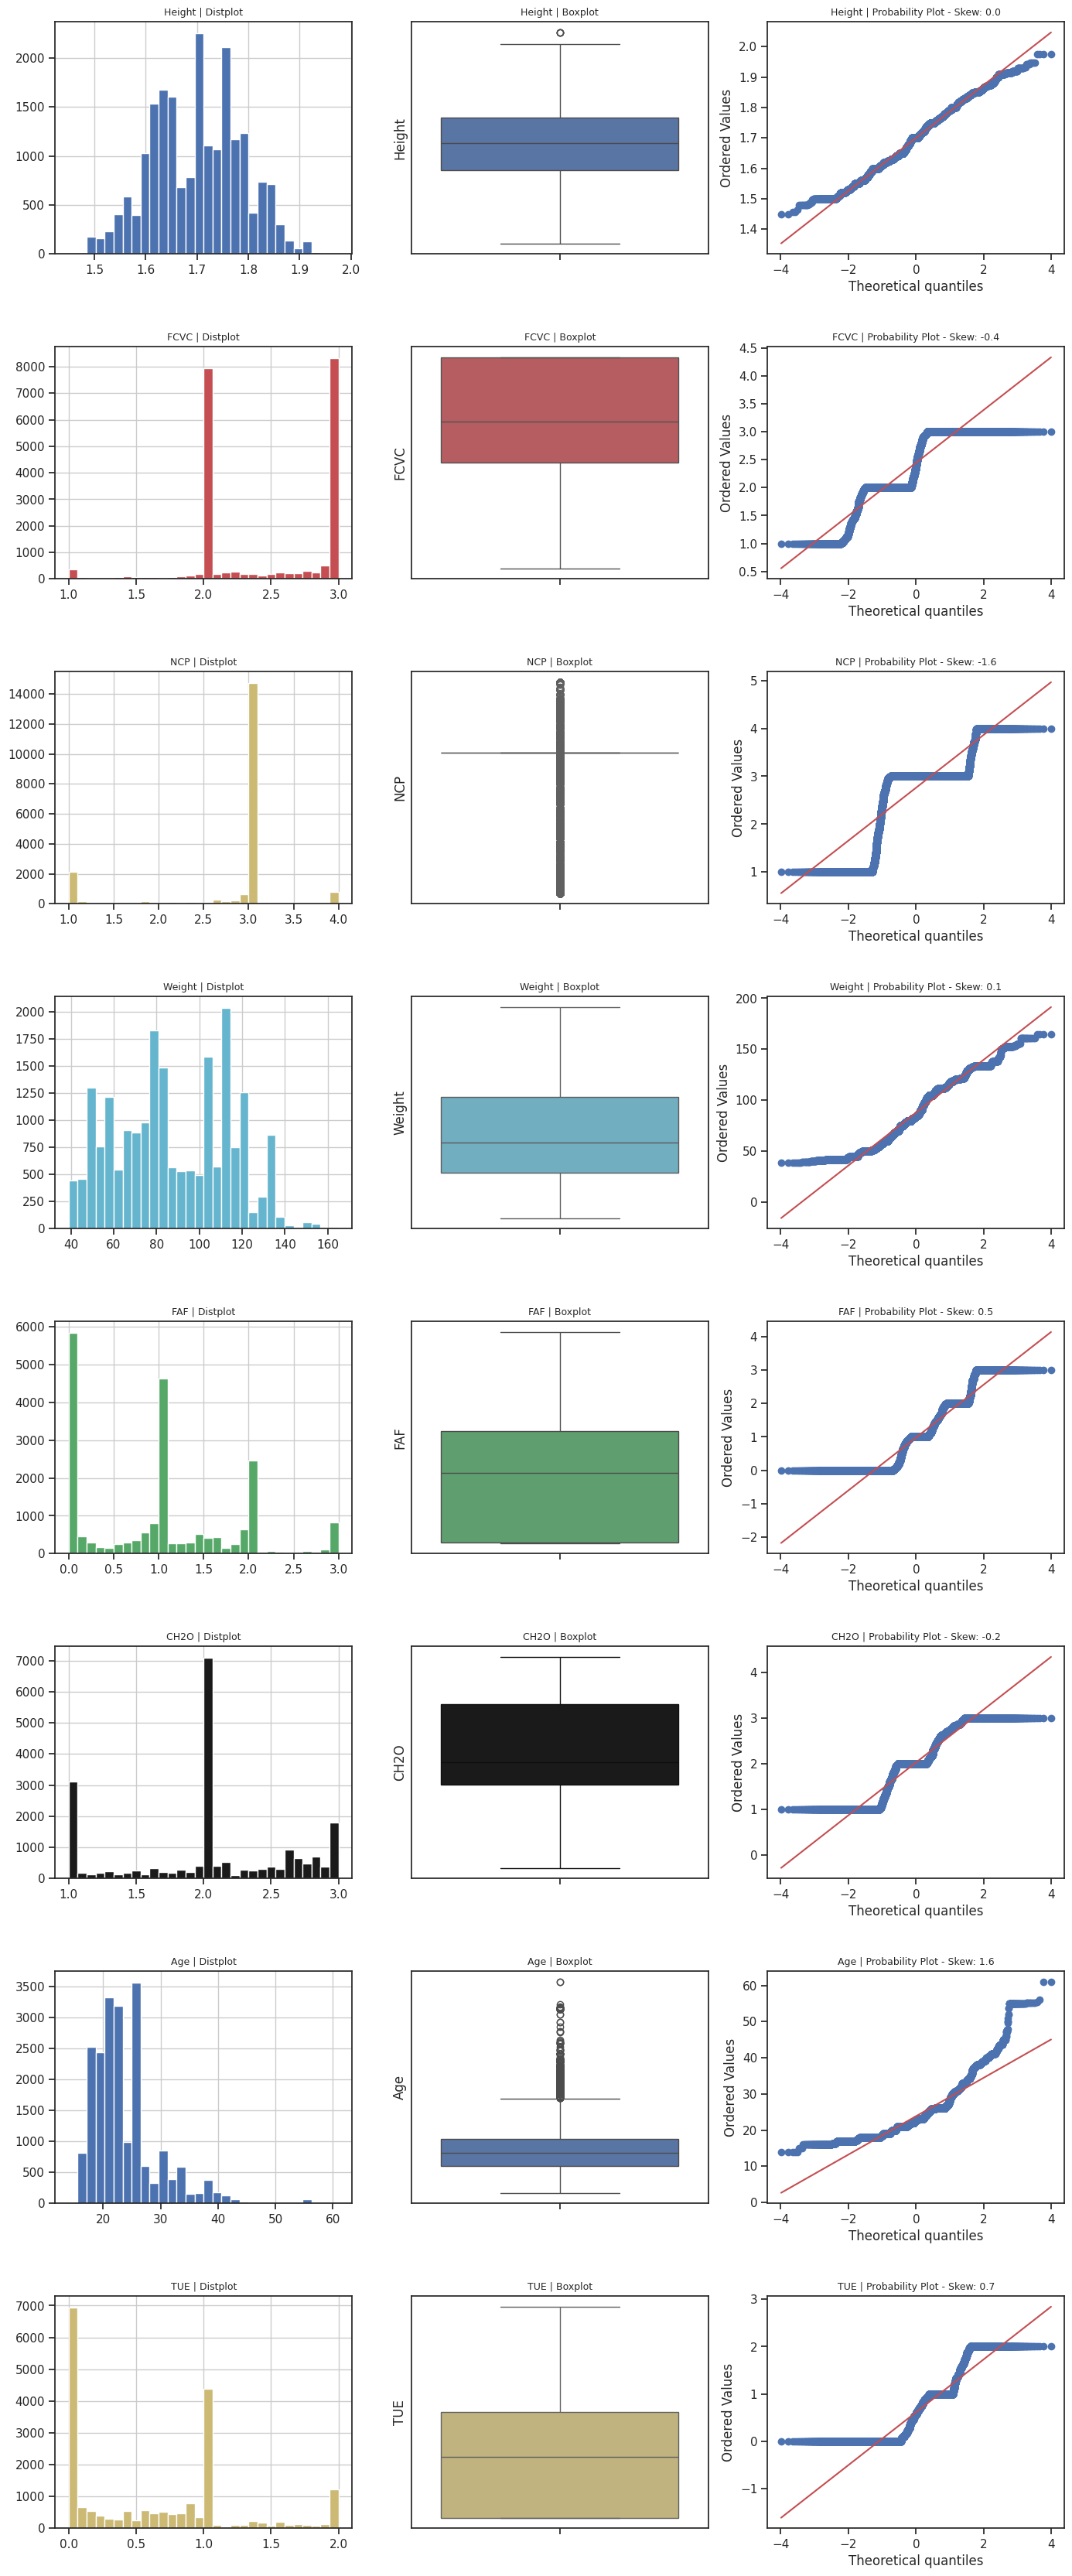

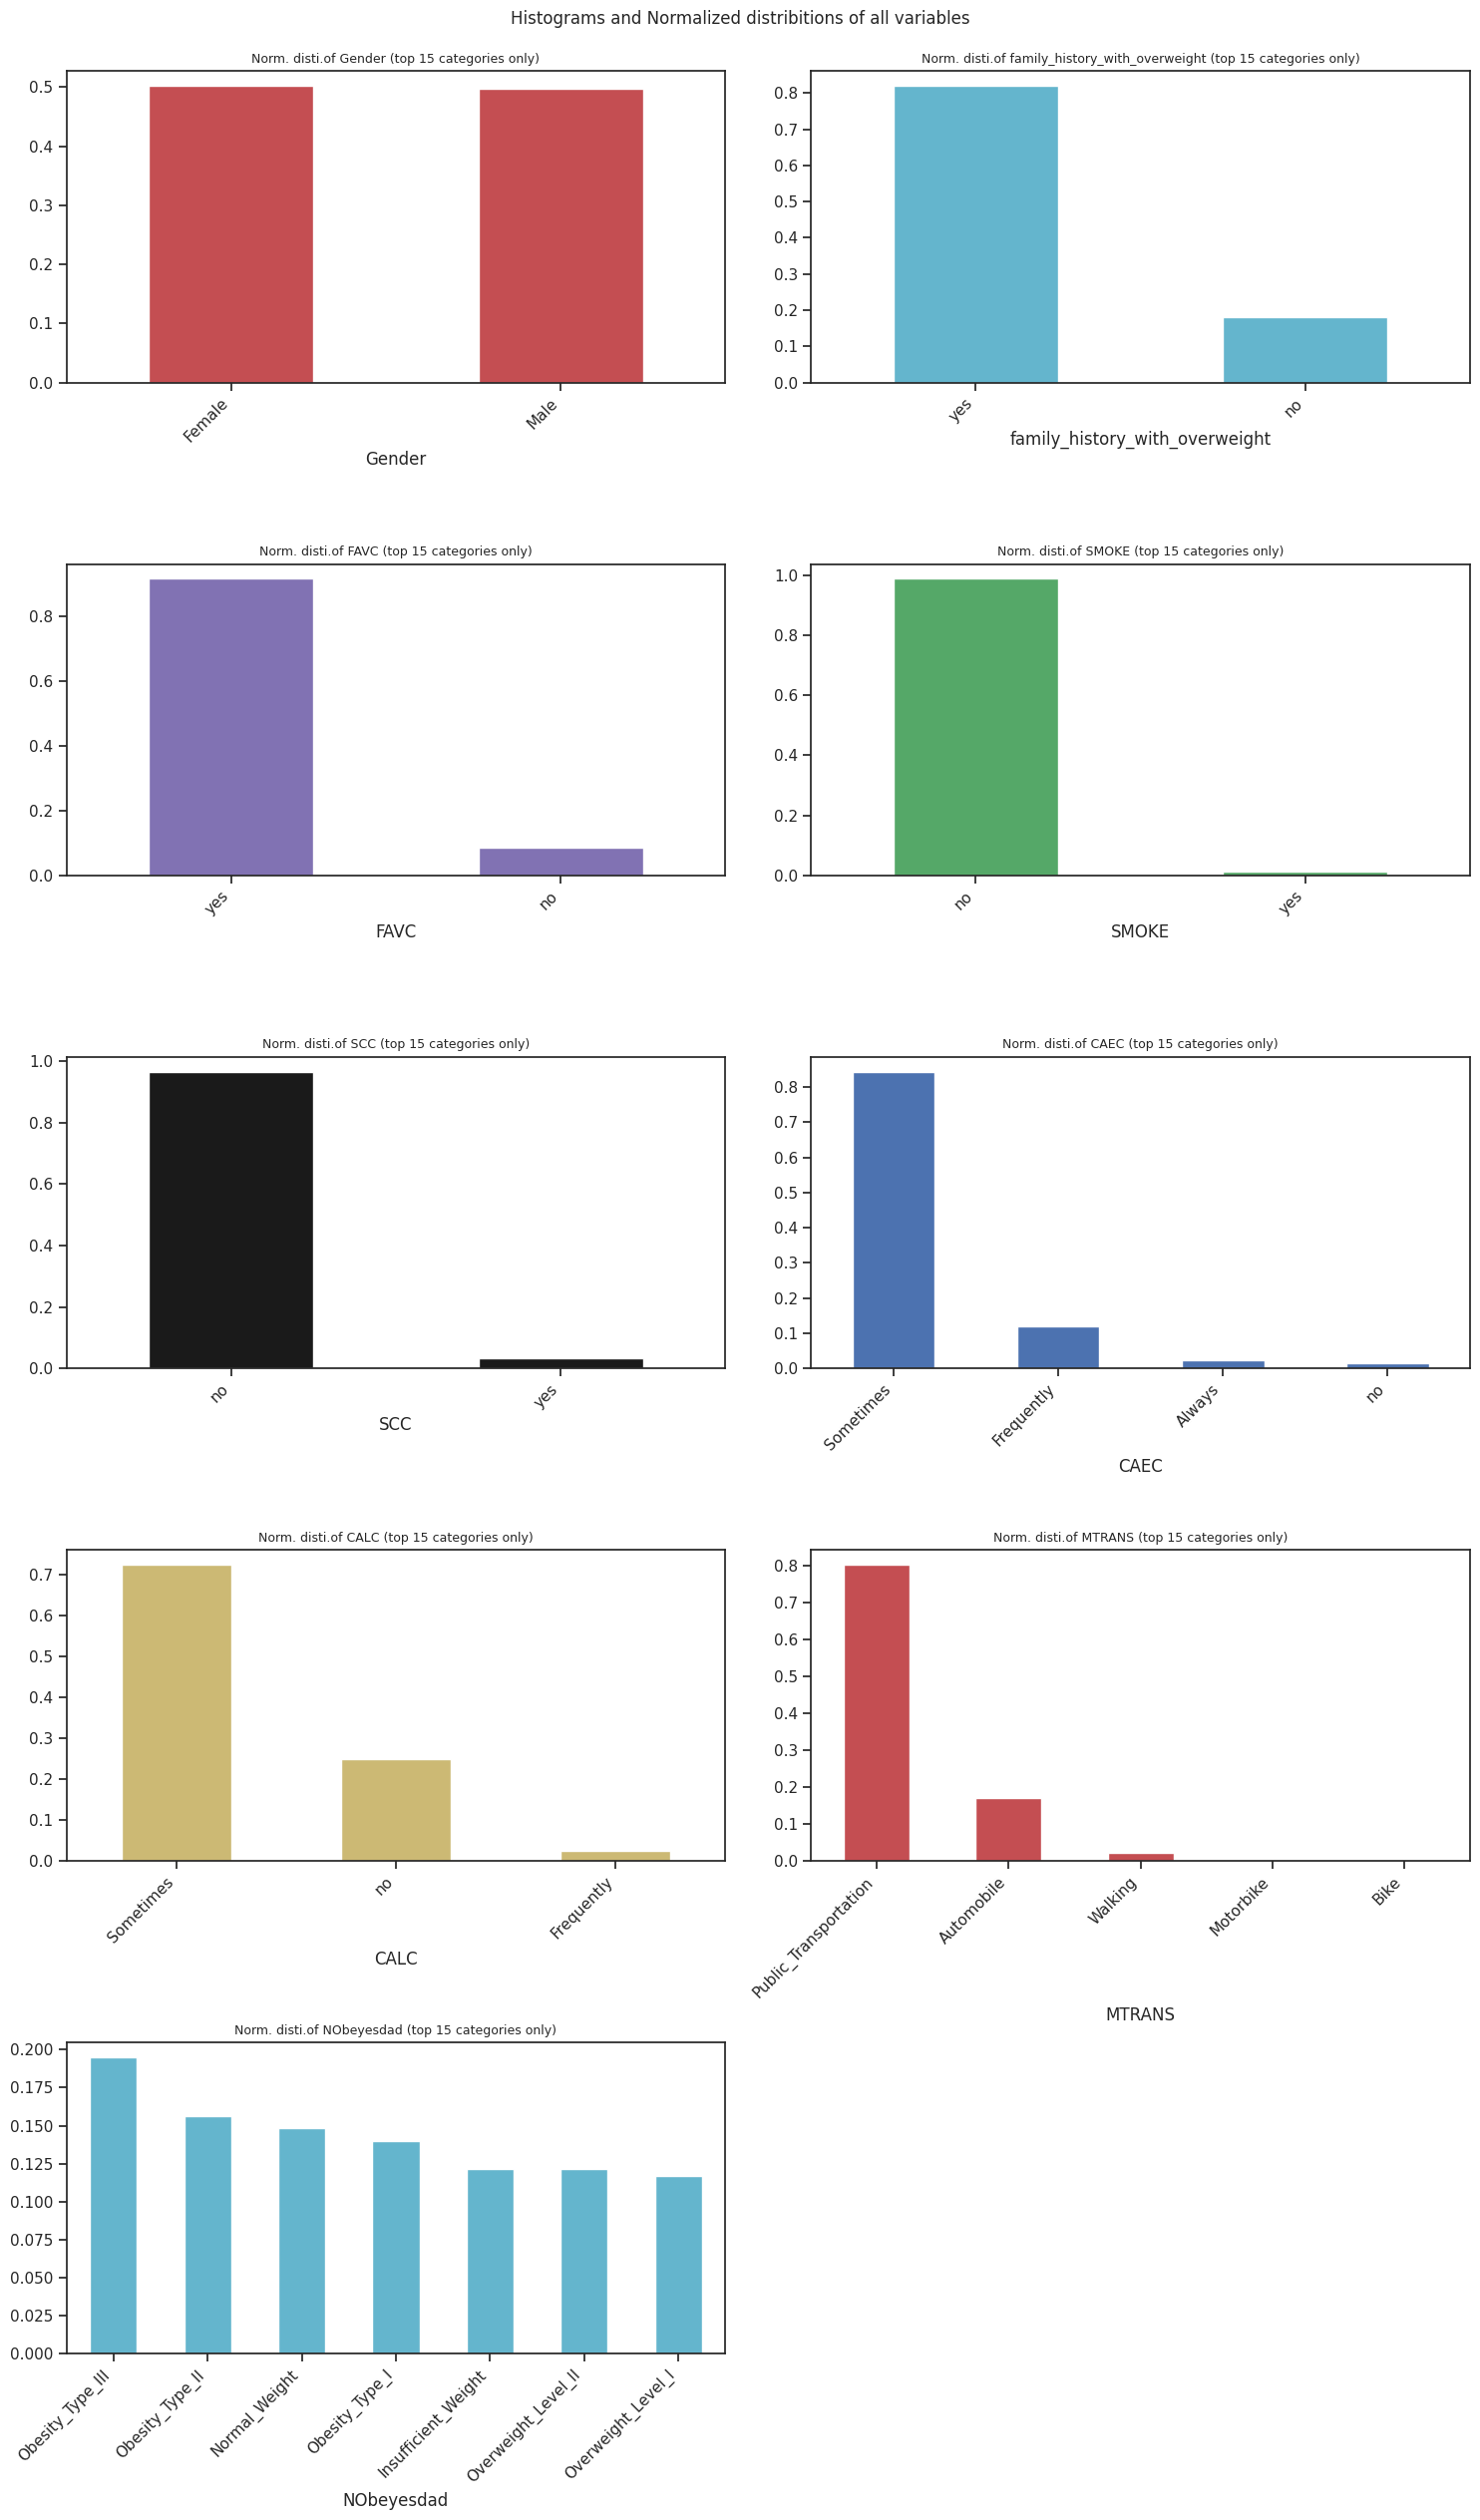

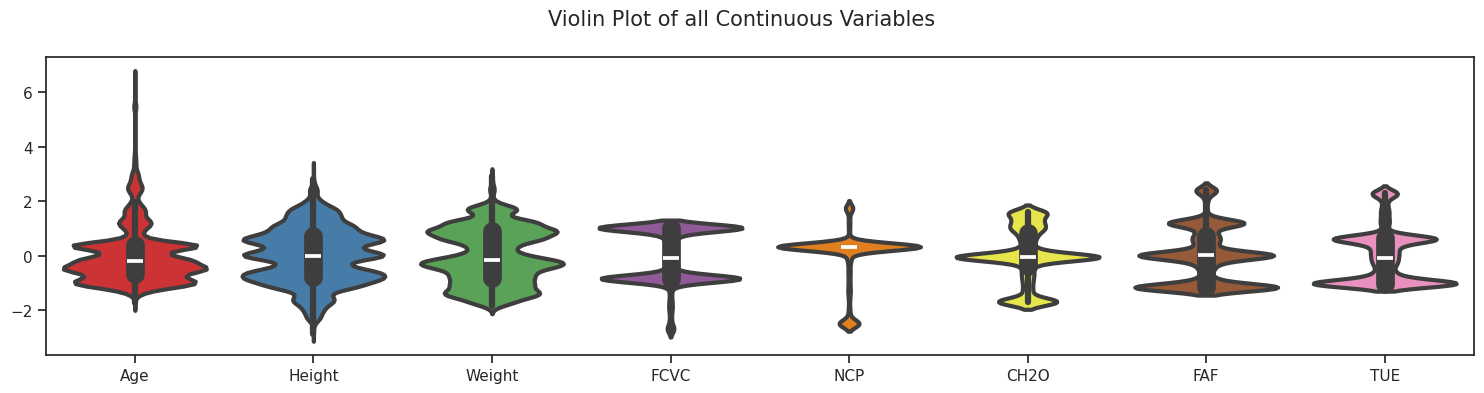

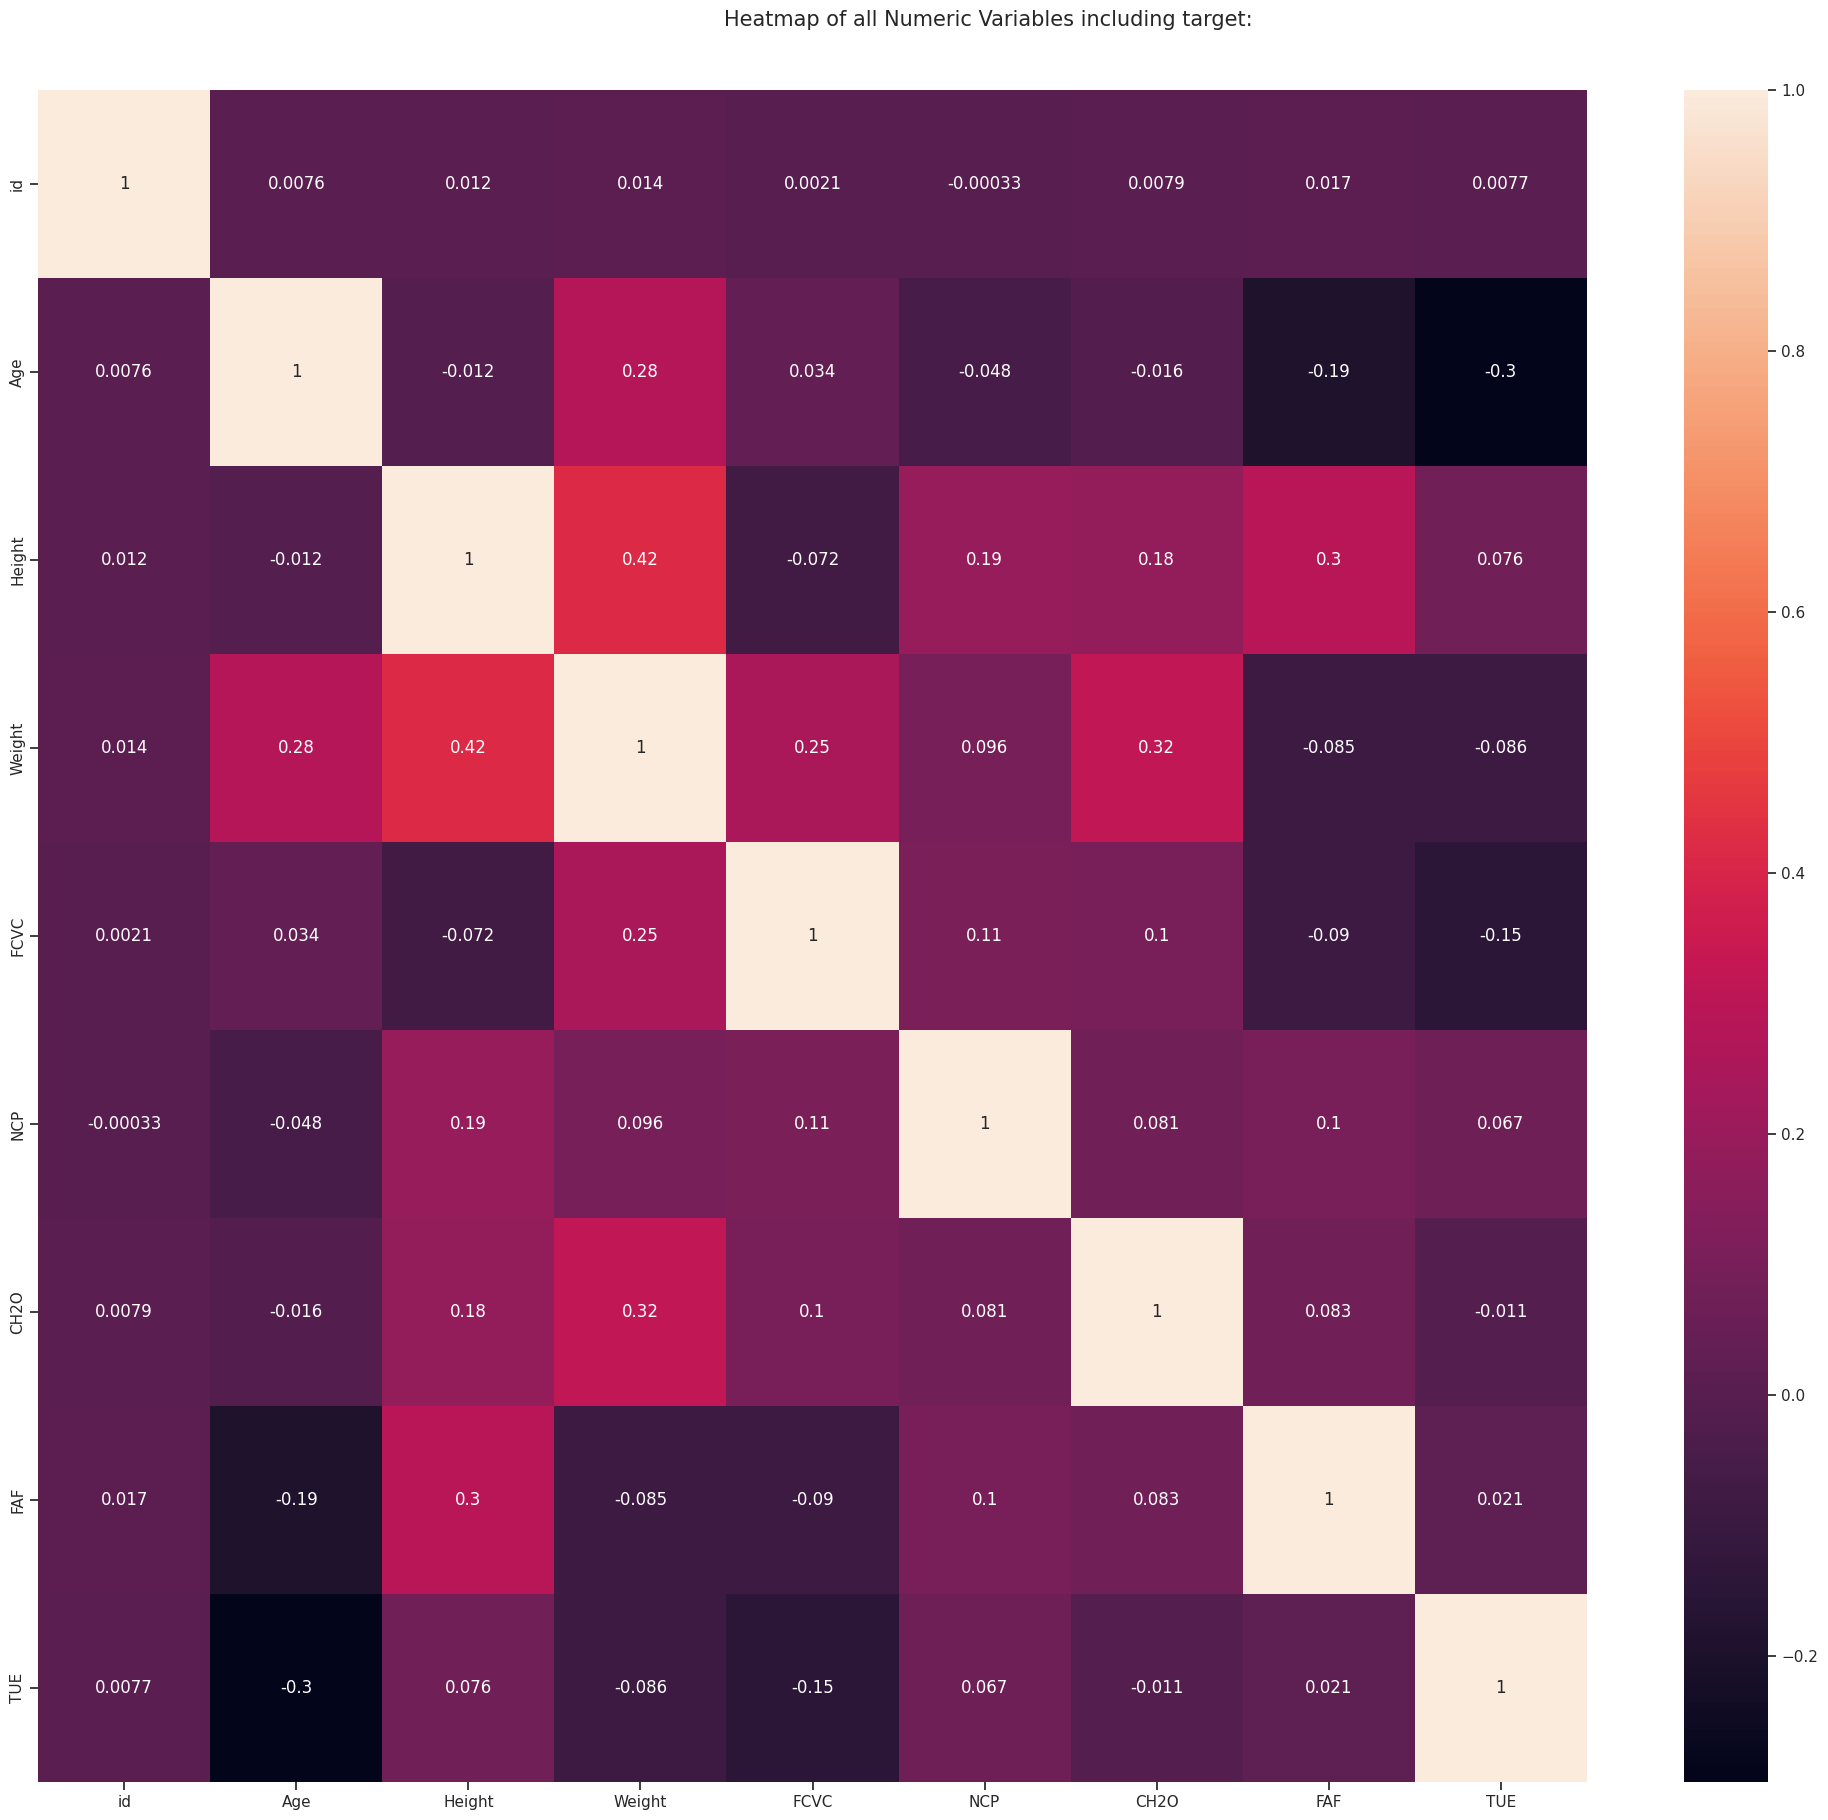

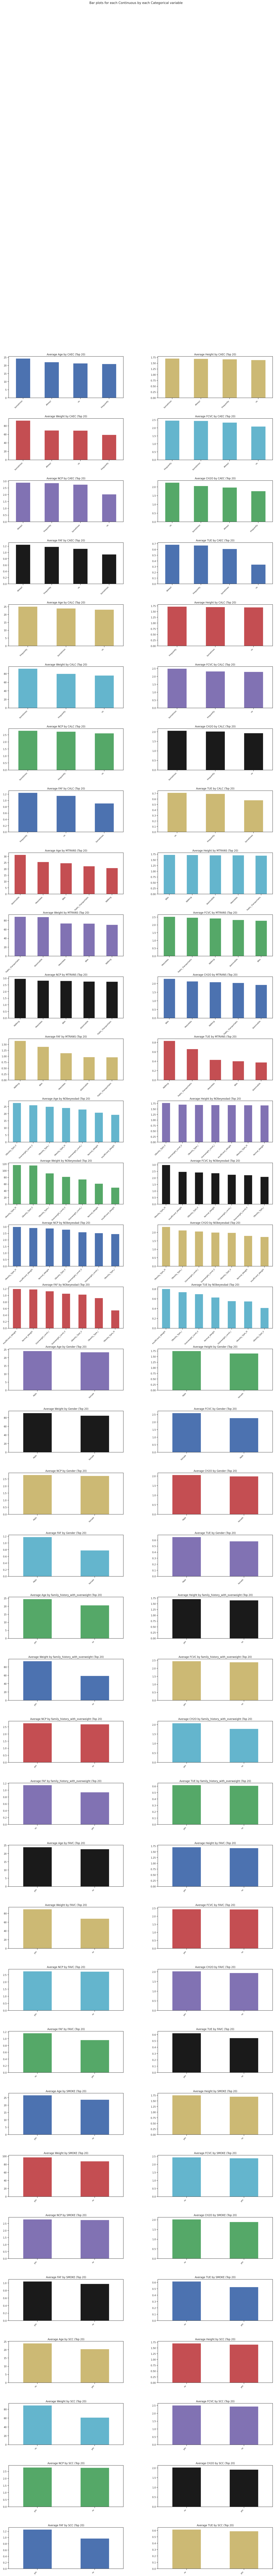

All Plots done
Time to run AutoViz = 46 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
#Utilize Autoviz package to assist with exploratory Data analysis
AV = AutoViz_Class()
%matplotlib inline
dft = AV.AutoViz(
    "",
    sep=",",
    depVar="",
    dfte=df,
)

Key points to note from the analysis

*  Age has some outliers that may need to be removed
*  Number of meals have some outlier - 1 and 4. Need to determine if that need to removed

In [ ]:
# Check for missing values
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

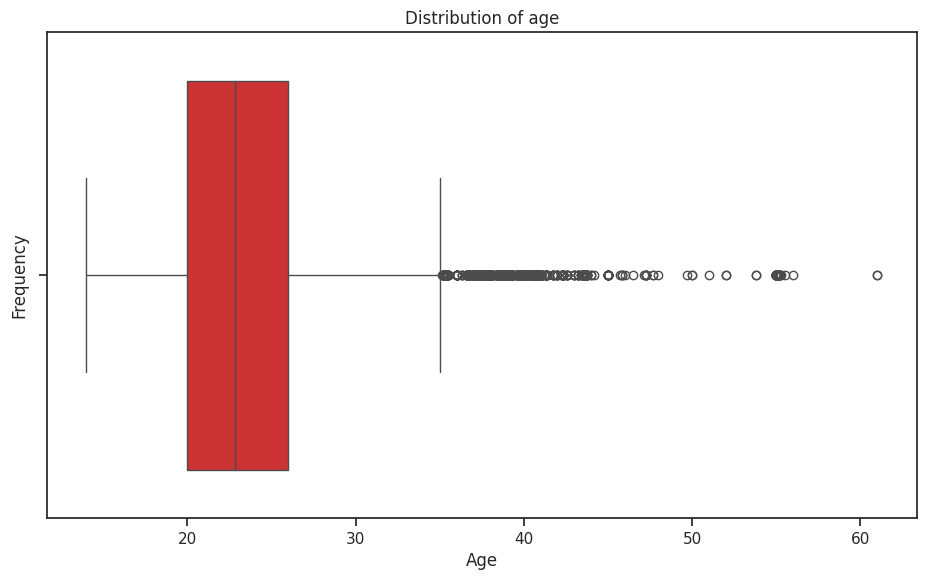

In [ ]:
#Box plot for age feature
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

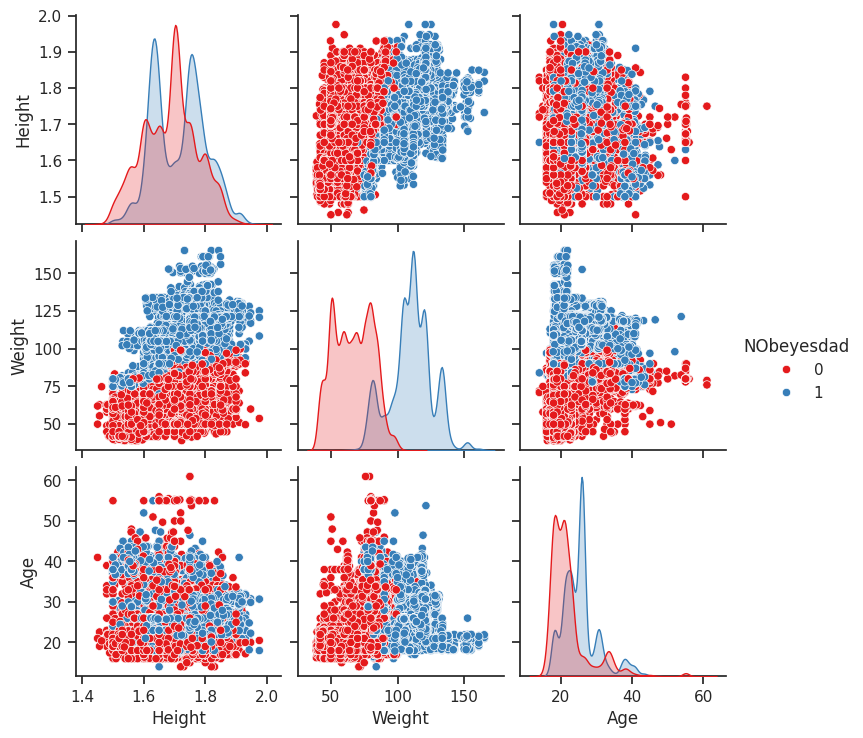

In [ ]:
#pairplot of attributes to check correlation between features

df_pairplot = df.copy()
df_pairplot['NObeyesdad'] =df_pairplot['NObeyesdad'].apply(lambda x: 0 if x in ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_II', 'Overweight_Level_I']  else 1 )
sns.pairplot(df_pairplot[['Height', 'Weight', 'Age', 'NObeyesdad']], hue ='NObeyesdad' )

**Observation** : Weight appears to be a clear predictor of obsesity. Inorder to understand other predictors, weight may need to dropped from the model

# Problem 5: Engineering Features

In [ ]:
# remove data with age > 35 (above upper fence 1.5 * Q3) - 1074 rows dropped
df = df[df['Age'] < 35]

In [ ]:
#encoding categorical & ordinal values
cat_cols = ['MTRANS']
ord_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC' ]

# CAEC Values - No, Sometimes, Frequently, Always
# CALC values - No, Sometimes, Frquently

col_transformer = make_column_transformer(
        (OneHotEncoder(), cat_cols),
        (OrdinalEncoder(), ord_cols),
        remainder='passthrough', verbose_feature_names_out=False)

df = pd.DataFrame(col_transformer.fit_transform(df), columns = col_transformer.get_feature_names_out())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19651 entries, 0 to 19650
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   MTRANS_Automobile               19651 non-null  object
 1   MTRANS_Bike                     19651 non-null  object
 2   MTRANS_Motorbike                19651 non-null  object
 3   MTRANS_Public_Transportation    19651 non-null  object
 4   MTRANS_Walking                  19651 non-null  object
 5   Gender                          19651 non-null  object
 6   family_history_with_overweight  19651 non-null  object
 7   FAVC                            19651 non-null  object
 8   CAEC                            19651 non-null  object
 9   SMOKE                           19651 non-null  object
 10  SCC                             19651 non-null  object
 11  CALC                            19651 non-null  object
 12  id                              19651 non-null

In [ ]:
df.head()

MTRANS_Automobile MTRANS_Bike MTRANS_Motorbike MTRANS_Public_Transportation  \
0         0.0            0.0           0.0                    1.0               
1         1.0            0.0           0.0                    0.0               
2         0.0            0.0           0.0                    1.0               
3         0.0            0.0           0.0                    1.0               
4         0.0            0.0           0.0                    1.0               

  MTRANS_Walking Gender family_history_with_overweight FAVC CAEC SMOKE SCC   \
0       0.0        1.0                1.0               1.0  2.0   0.0  0.0   
1       0.0        0.0                1.0               1.0  1.0   0.0  0.0   
2       0.0        0.0                1.0               1.0  2.0   0.0  0.0   
3       0.0        0.0                1.0               1.0  2.0   0.0  0.0   
4       0.0        1.0                1.0               1.0  2.0   0.0  0.0   

  CALC id    Age       Height     Weight      FCVC      NCP       CH2O    \
0  1.0  0  24.443011  1.699998    81.66995       2.0  2.983297  2.763573   
1  2.0  1       18.0      1.56        57.0       2.0       3.0       2.0   
2  2.0  2       18.0   1.71146   50.165754  1.880534  1.411685  1.910378   
3  1.0  3  20.952737   1.71073  131.274851       3.0       3.0  1.674061   
4  1.0  4  31.641081  1.914186   93.798055  2.679664  1.971472  1.979848   

     FAF       TUE         NObeyesdad       
0       0.0  0.976473  Overweight_Level_II  
1       1.0       1.0        Normal_Weight  
2  0.866045  1.673584  Insufficient_Weight  
3  1.467863  0.780199     Obesity_Type_III  
4  1.967973  0.931721  Overweight_Level_II

In [ ]:
#perform VIF analysis to eliminate highgly correelated features
X_vif = df[['Height', 'Weight', 'Age', 'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC','SMOKE','SCC','CALC']]
y_vif = df['NObeyesdad']
y_vif = y_vif.apply(lambda x: 0 if x in ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_II', 'Overweight_Level_I']  else 1 )

In [ ]:
# VIF - measure of the multicollinearity in the independent features
def vif(exogs, data):
  vif_dict = {}

  for exog in exogs:
    not_exog = [i for i in exogs if i != exog]
    X_vif, y_vif = data[not_exog], data[exog]

    r_squared = LinearRegression().fit(X_vif,y_vif).score(X_vif,y_vif)

    # calc the VIF
    vif = 1/(1-r_squared)
    vif_dict[exog] = vif

  return pd.DataFrame({"VIF":vif_dict})

In [ ]:
vif(X_vif.columns, X_vif).sort_values(by = 'VIF', ascending = False)

VIF  
Weight                          2.147953
Height                          2.116802
Gender                          1.780094
family_history_with_overweight  1.440631
Age                             1.301207
CAEC                            1.154784
CALC                            1.089041
FAVC                            1.071079
SCC                             1.055059
SMOKE                           1.014721

**Observation** : No major multicolinearity between cols in the dataset

# Problem 6: Train/Test Split

In [ ]:
X = df.drop('NObeyesdad', axis = 1)
y= df['NObeyesdad']

In [ ]:
# Weight appears to be a clear predictor of obsesity. Inorder to understand other predictors, weight need to dropped from the model
X = X.drop('Weight', axis = 1)

In [ ]:
# to simplify classfication map ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_II', 'Overweight_Level_I']  to zero and ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']  to 1
y=y.apply(lambda x: 0 if x in ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_II', 'Overweight_Level_I']  else 1 )

In [ ]:
y.value_counts(normalize = 1)

NObeyesdad
0    0.515445
1    0.484555
Name: proportion, dtype: float64

In [ ]:
#split into test and train datasets. Stratifying split given the dataset is highly imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 42, test_size=0.7, stratify = y)

In [ ]:
#scaling the features before modelling (not applicable for DecsionTree)
std_scaler = StandardScaler()
scaled_train = std_scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(scaled_train, columns = std_scaler.get_feature_names_out())

scaled_test = std_scaler.transform(X_test)
X_test_scaled= pd.DataFrame(scaled_test, columns = std_scaler.get_feature_names_out())

# Problem 7: A Baseline Model

In [ ]:
#validaing assumuption for model performance using a baseline model. classifier model output needs to be better than 50%
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)
print(baseline_score)

0.5154114568188427


# Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      7090
           1       0.78      0.85      0.82      6666

    accuracy                           0.81     13756
   macro avg       0.82      0.81      0.81     13756
weighted avg       0.82      0.81      0.81     13756

Accuracy Test Score : 0.8136813027042745
Accuracy Train Score : 0.8181509754028838


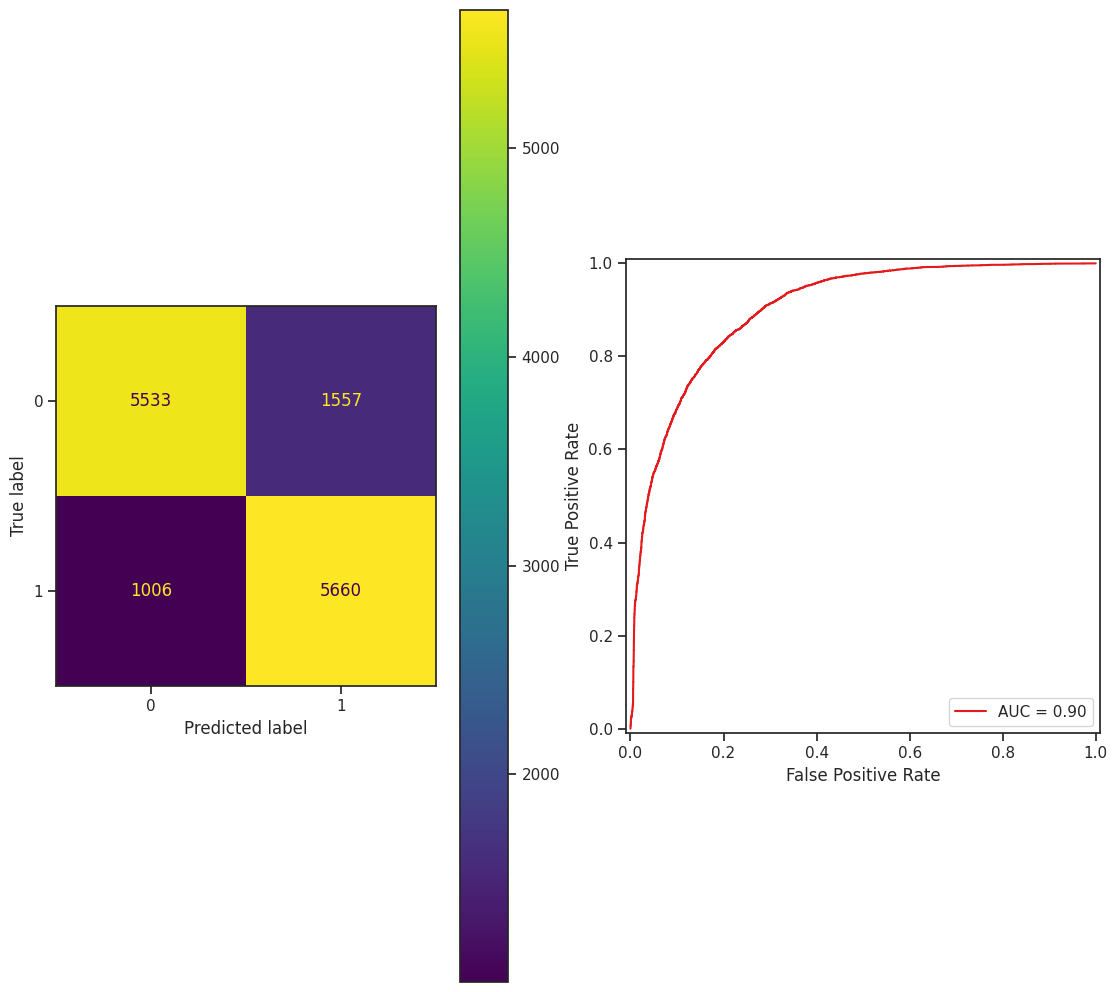

In [ ]:
#Initial classifier model- logisticial regression with default constructor values. Also plotting the performance scores,
#confusion matrix and AUC score

logmodel = LogisticRegression(max_iter = 1000)
start_time = time.time()
logmodel.fit(X_train_scaled, y_train)
log_train_time = time.time() - start_time
y_pred = logmodel.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
log_train_score = accuracy_score(y_train, logmodel.predict(X_train_scaled))
log_test_score = accuracy_score(y_test, logmodel.predict(X_test_scaled))
print("Accuracy Test Score :", log_test_score)
print("Accuracy Train Score :", log_train_score)


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])

# ROC Curve
y_score = logmodel.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
log_roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=log_roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(log_roc_auc_value, 2)

# Problem 9: Score the Model

Weighted F1 score 0.81. Given the dataset is balanced and the original criteria for Kaggle compeition is accuracy score, accuracy is the appropriate performance metric to test performance.

# Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models. Using the default settings for each of the models, fit and score each. We will also compare the fit time of each of the models.

In [ ]:
#Setting up dataframe to record the performance of multiple classification models

res_dict = {'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'SVC'],
           'Train Time': [0, 0, 0,0 ],
            'Train Accuracy': [0, 0, 0, 0],
           'Test Accuracy': [0, 0, 0, 0]
           }


results_df = pd.DataFrame(res_dict).set_index('Model')

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      7090
           1       0.85      0.85      0.85      6666

    accuracy                           0.85     13756
   macro avg       0.85      0.85      0.85     13756
weighted avg       0.85      0.85      0.85     13756



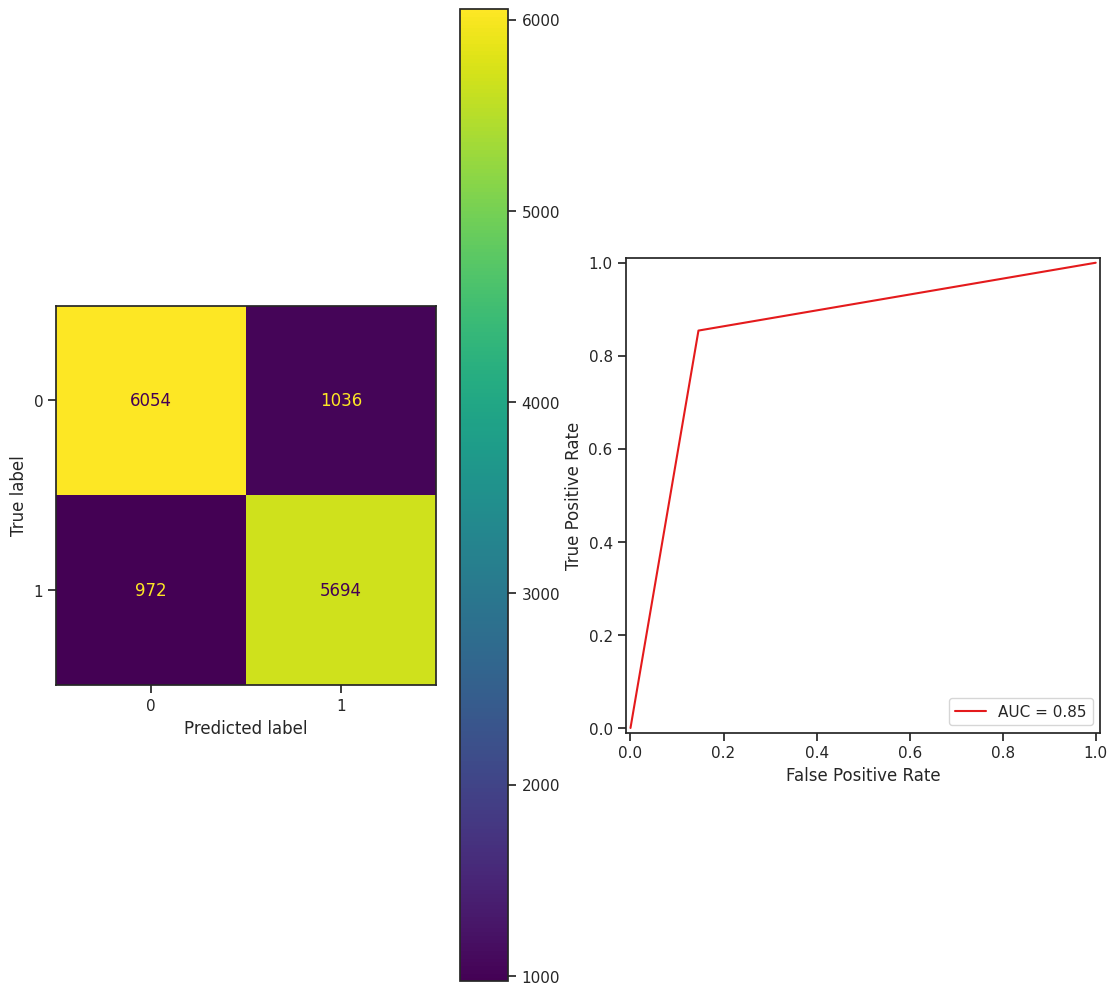

In [ ]:
#Decision Tree with default constructor values. Also plotting the performance scores, confusion matrix and AUC score


dtreemodel = DecisionTreeClassifier()
start_time = time.time()
dtreemodel.fit(X_train, y_train)
dt_train_time = time.time() - start_time
y_pred = dtreemodel.predict(X_test)
print(classification_report(y_test, y_pred))
dt_train_score = accuracy_score(y_train, dtreemodel.predict(X_train))
dt_test_score = accuracy_score(y_test, dtreemodel.predict(X_test))

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])

# ROC Curve
y_score = dtreemodel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
dt_roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=dt_roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(dt_roc_auc_value, 2)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7090
           1       0.85      0.87      0.86      6666

    accuracy                           0.86     13756
   macro avg       0.86      0.86      0.86     13756
weighted avg       0.86      0.86      0.86     13756



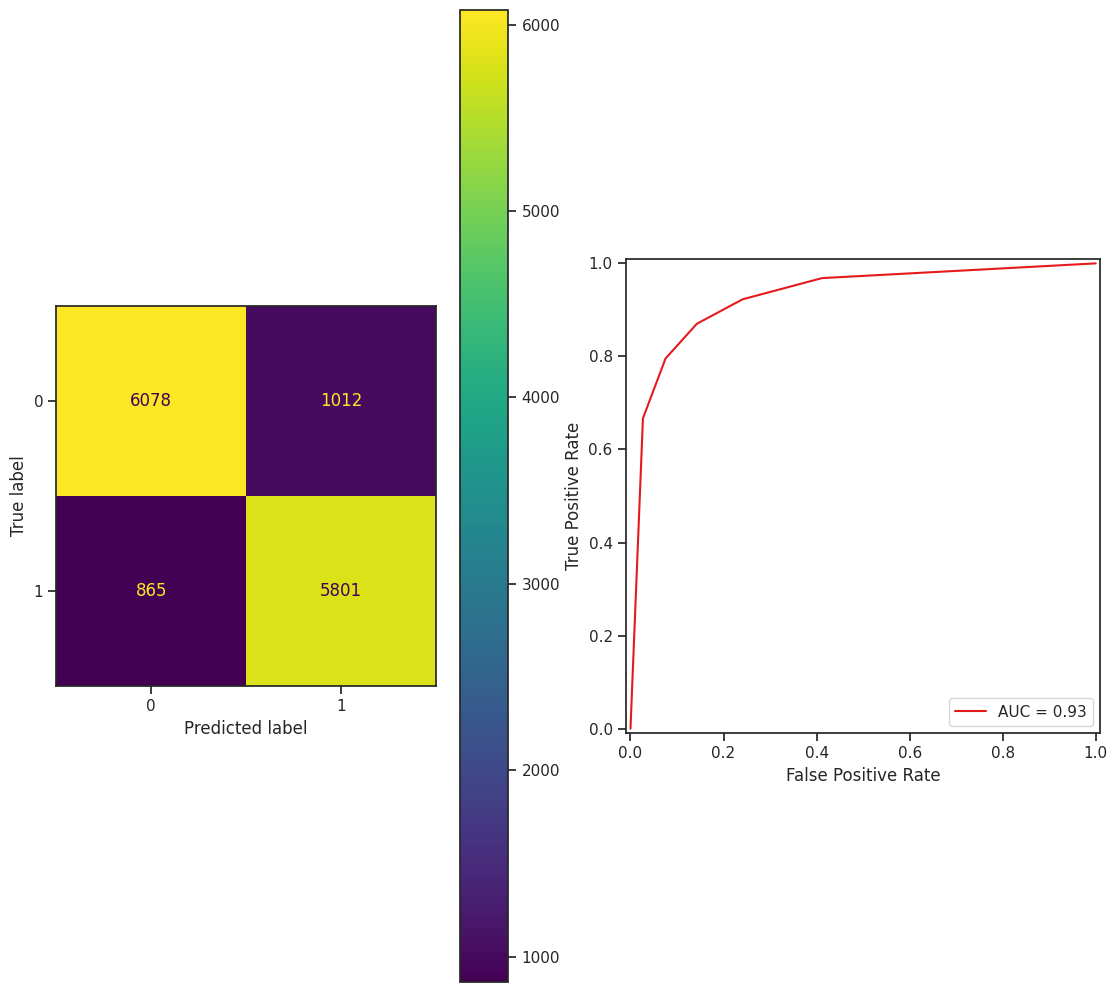

In [ ]:
#KNN model with default constructor values. Also plotting the performance scores, confusion matrix and AUC score

knnmodel = KNeighborsClassifier()
start_time = time.time()
knnmodel.fit(X_train_scaled, y_train)
knn_train_time = time.time() - start_time
y_pred = knnmodel.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
knn_train_score = accuracy_score(y_train, knnmodel.predict(X_train_scaled))
knn_test_score = accuracy_score(y_test, knnmodel.predict(X_test_scaled))


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])

# ROC Curve
y_score = knnmodel.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
knn_roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=knn_roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(knn_roc_auc_value, 2)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7090
           1       0.87      0.87      0.87      6666

    accuracy                           0.87     13756
   macro avg       0.87      0.87      0.87     13756
weighted avg       0.87      0.87      0.87     13756



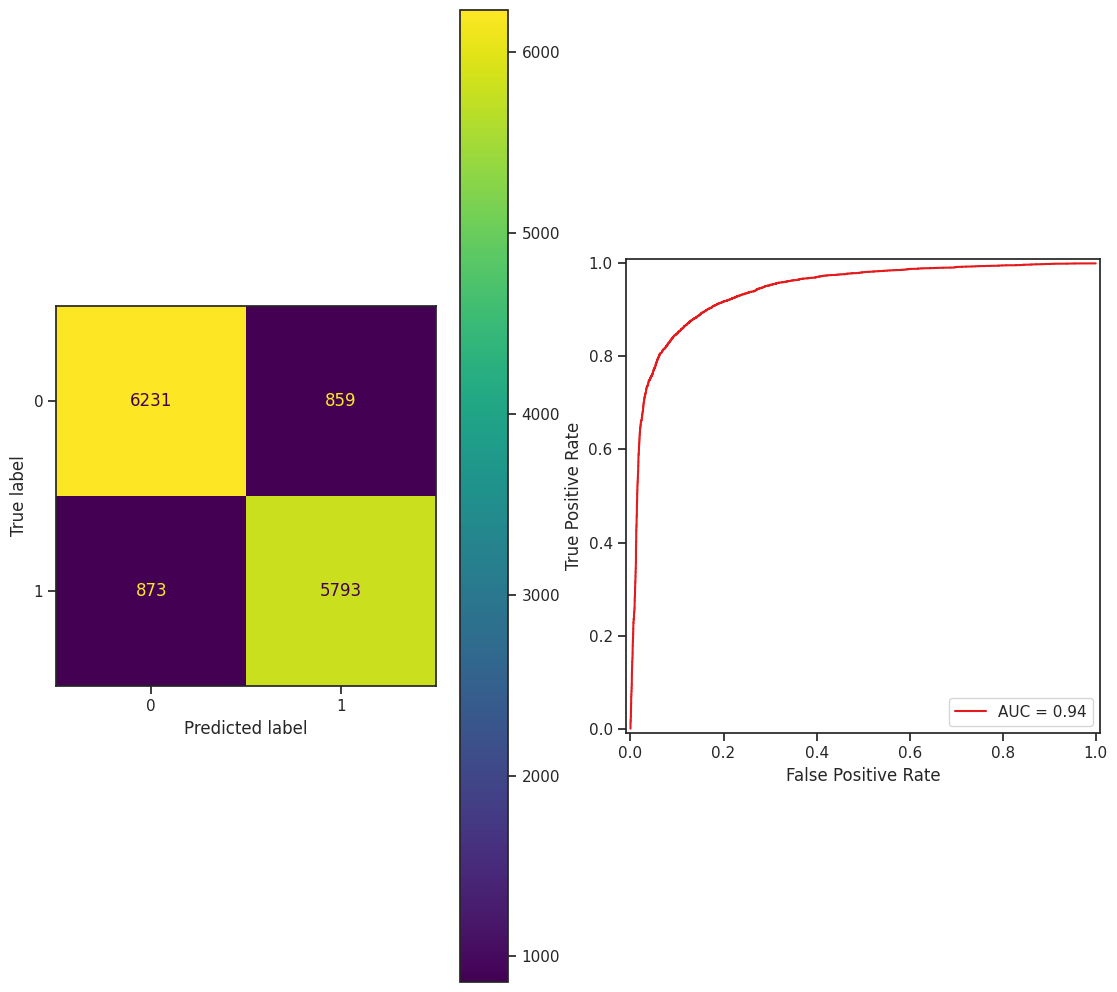

In [ ]:
#SVM model  with default constructor values. Also plotting the performance scores, confusion matrix and AUC score

svcmodel = SVC()
start_time = time.time()
svcmodel.fit(X_train_scaled, y_train)
svc_train_time = time.time() - start_time
y_pred = svcmodel.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
#ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
svc_train_score = accuracy_score(y_train, svcmodel.predict(X_train_scaled))
svc_test_score = accuracy_score(y_test, svcmodel.predict(X_test_scaled))


fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])

# ROC Curve
y_score = svcmodel.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
svm_roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=svm_roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(svm_roc_auc_value, 2)

In [ ]:
results_df.loc[:, 'Train Time'] = [log_train_time, dt_train_time,knn_train_time,svc_train_time]
results_df.loc[:, 'Train Accuracy'] = [log_train_score, dt_train_score,knn_train_score,svc_train_score]
results_df.loc[:, 'Test Accuracy'] = [log_test_score, dt_test_score,knn_test_score,svc_test_score]

#printing the summary of model performance accross metrics for all the classification models tested so far -
# metrics considered time to train, accuracy on training and accuracy on  testing data
print(results_df)

                     Train Time  Train Accuracy  Test Accuracy
Model                                                         
Logistic Regression   0.083807      0.818151       0.813681   
Decision Tree         0.418061      1.000000       0.854027   
KNN                   0.023862      0.906192       0.863550   
SVC                   1.478418      0.894656       0.874091   


# Problem 11: Improving the Model



*   Test ensemble model - Random Forest
*   Hyperparameter tuning and grid search







In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_1 = RandomForestClassifier(oob_score=True, random_state=42).fit(X_train, y_train)
score = forest_1.oob_score_
print(score)

0.90754877014419


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7090
           1       0.93      0.87      0.90      6666

    accuracy                           0.90     13756
   macro avg       0.90      0.90      0.90     13756
weighted avg       0.90      0.90      0.90     13756



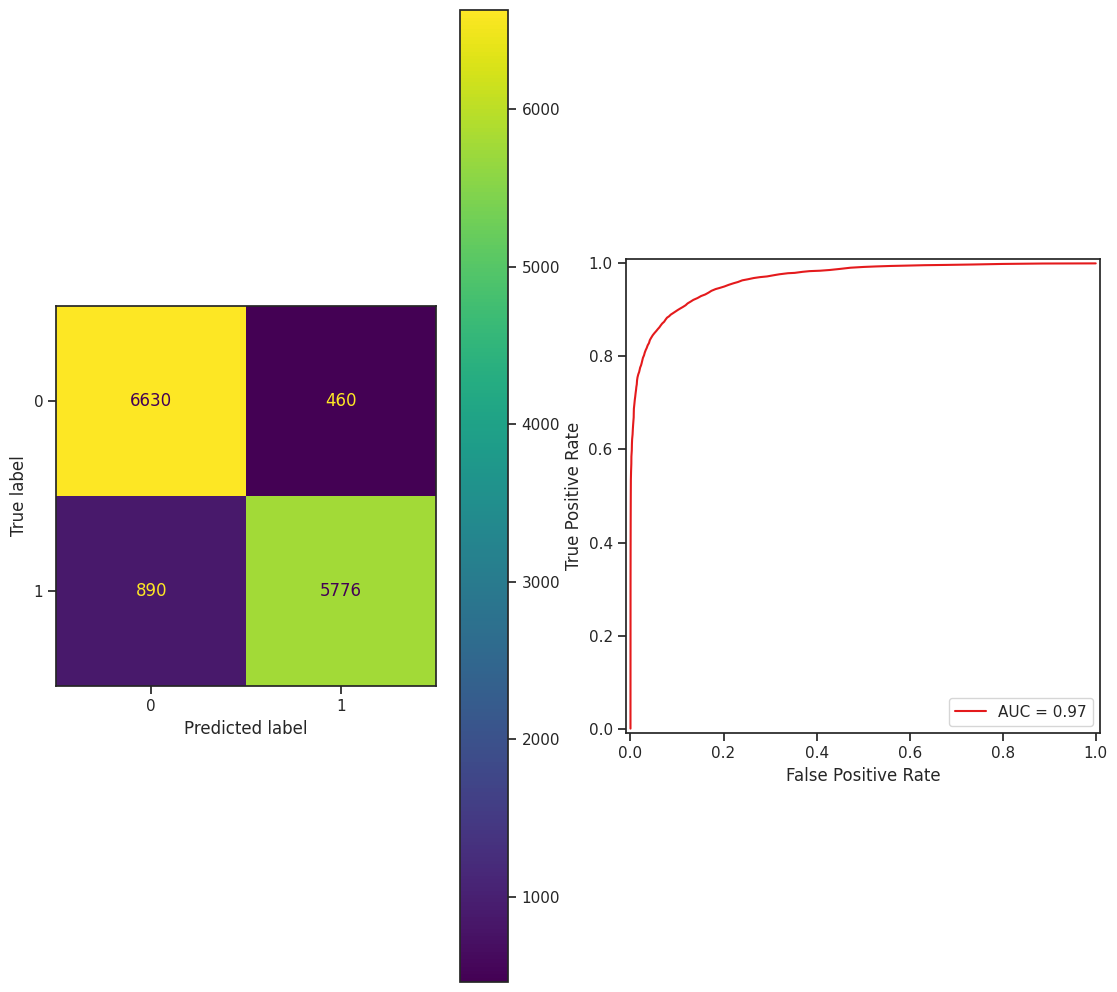

In [ ]:
#Random forest with default constructor values. Also plotting the performance scores, confusion matrix and AUC score


rforestmodel = RandomForestClassifier(oob_score=True, random_state=42)
start_time = time.time()
rforestmodel.fit(X_train, y_train)
rf_train_time = time.time() - start_time
y_pred = rforestmodel.predict(X_test)
print(classification_report(y_test, y_pred))
rf_train_score = accuracy_score(y_train, rforestmodel.predict(X_train))
rf_test_score = accuracy_score(y_test, rforestmodel.predict(X_test))

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])

# ROC Curve
y_score = rforestmodel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
dt_roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=dt_roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(dt_roc_auc_value, 2)

In [ ]:
# Adding result of the Random Forest classifier to the model comparison dataframe
new_row = {'Train Time': rf_train_time, 'Train Accuracy': rf_train_score, 'Test Accuracy': rf_test_score}

# Add a new row with index label 'New Model'
results_df.loc['Random Forest'] = new_row


#printing the summary of model performance accross metrics for all the classification models tested so far (updated with Ranform Forest)
# metrics considered time to train, accuracy on training and accuracy on  testing data
print(results_df)

                     Train Time  Train Accuracy  Test Accuracy
Model                                                         
Logistic Regression   0.083807      0.818151       0.813681   
Decision Tree         0.418061      1.000000       0.854027   
KNN                   0.023862      0.906192       0.863550   
SVC                   1.478418      0.894656       0.874091   
Random Forest         1.601247      1.000000       0.901861   


**Based on the intial modelling, Random Forest ensemble model appears to perform better with supperior accuracy score with higher execution time. Given the dataset, the increased time is not a major trade off. Hence choosing Random forest model for further optimization**

In [ ]:
# #Grid search to identify the best random forest hyperparamters
params = {'n_estimators': [1, 10, 100, 500, 1000, 2000],
         'max_depth': [1, 2, 3, 4, 5, None]}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=5,verbose=3,
                   scoring = 'accuracy')
rf_grid.fit(X_train, y_train)
print("Best Random Forest model score : %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .......max_depth=1, n_estimators=1;, score=0.670 total time=   0.0s
[CV 2/5] END .......max_depth=1, n_estimators=1;, score=0.658 total time=   0.0s
[CV 3/5] END .......max_depth=1, n_estimators=1;, score=0.669 total time=   0.0s
[CV 4/5] END .......max_depth=1, n_estimators=1;, score=0.668 total time=   0.0s
[CV 5/5] END .......max_depth=1, n_estimators=1;, score=0.681 total time=   0.0s
[CV 1/5] END ......max_depth=1, n_estimators=10;, score=0.746 total time=   0.1s
[CV 2/5] END ......max_depth=1, n_estimators=10;, score=0.757 total time=   0.1s
[CV 3/5] END ......max_depth=1, n_estimators=10;, score=0.751 total time=   0.1s
[CV 4/5] END ......max_depth=1, n_estimators=10;, score=0.755 total time=   0.1s
[CV 5/5] END ......max_depth=1, n_estimators=10;, score=0.755 total time=   0.1s
[CV 1/5] END .....max_depth=1, n_estimators=100;, score=0.809 total time=   0.5s
[CV 2/5] END .....max_depth=1, n_estimators=100

Only a marginal improvement in accuracy score after hyperparameter tuning

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7090
           1       0.93      0.87      0.90      6666

    accuracy                           0.90     13756
   macro avg       0.90      0.90      0.90     13756
weighted avg       0.90      0.90      0.90     13756



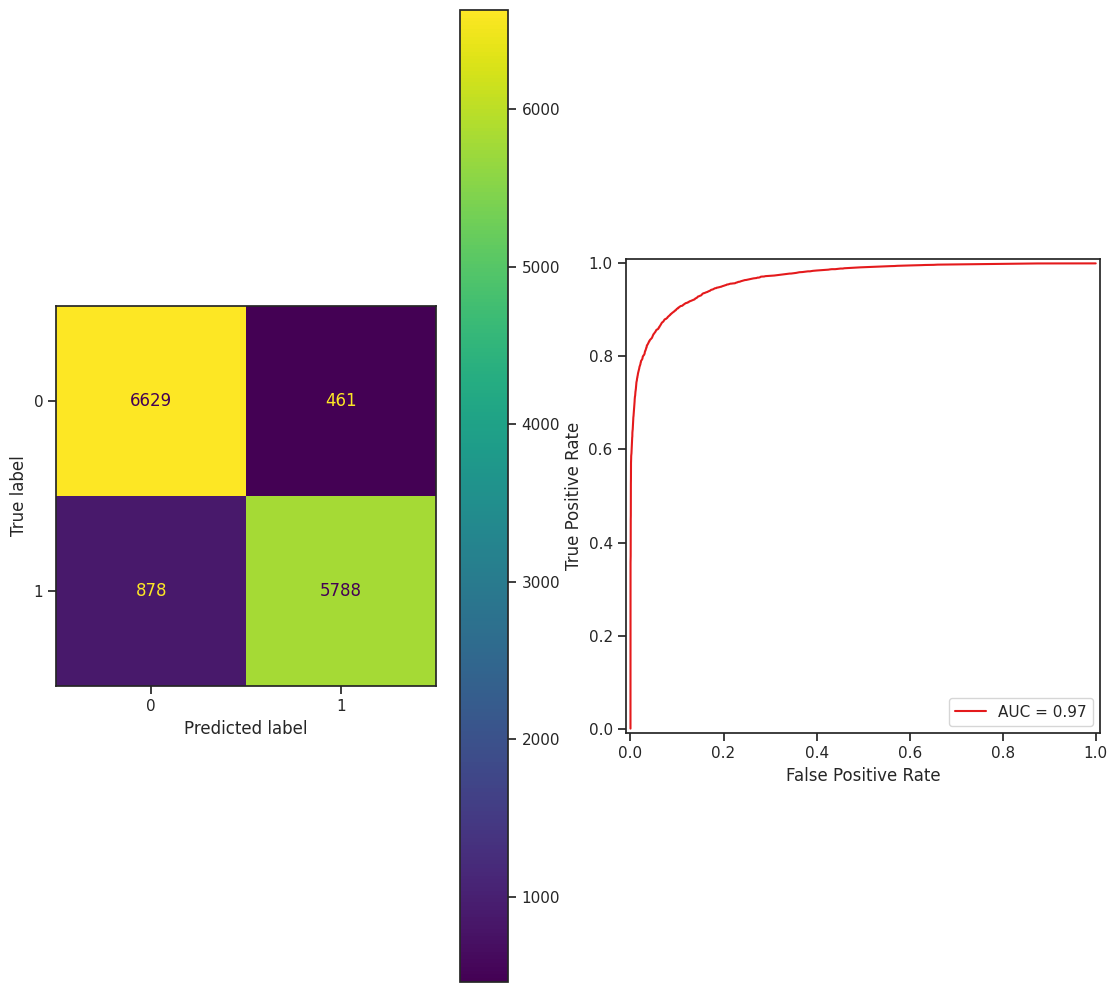

In [ ]:
# Rerun Random forest model using optimal hyperparamemetrs

rforestmodel = RandomForestClassifier(oob_score=True, n_estimators = 500, max_depth = None , random_state=42)
start_time = time.time()
rforestmodel.fit(X_train, y_train)
rf_train_time = time.time() - start_time
y_pred = rforestmodel.predict(X_test)
print(classification_report(y_test, y_pred))
rf_train_score = accuracy_score(y_train, rforestmodel.predict(X_train))
rf_test_score = accuracy_score(y_test, rforestmodel.predict(X_test))

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])

# ROC Curve
y_score = rforestmodel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
dt_roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=dt_roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(dt_roc_auc_value, 2)

In [ ]:
#running permutation to identify features with highest impact to classification
from sklearn.inspection import permutation_importance
%matplotlib inline
perm_importance = permutation_importance(rforestmodel, X_test, y_test, n_repeats = 30, max_samples = 100 )

Text(0.5, 0, 'Permutation Importance')

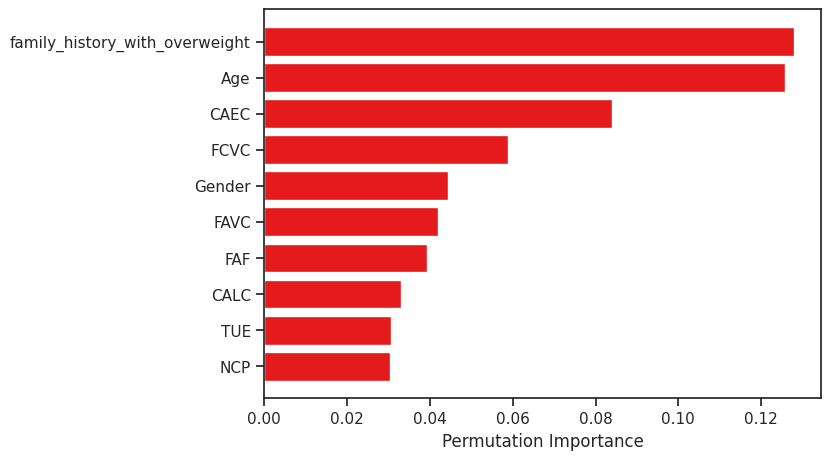

In [ ]:
feature_names = X_test.columns
features = np.array(feature_names)
#fig = plt.figure(figsize=(30, 8))
sorted_idx = perm_importance.importances_mean.argsort()
sorted_idx = perm_importance.importances_mean.argsort()[-10:]
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# Problem 12: Key Takeaways  and Reccomendations


*   Family history appears to be highest predictor obesity
*   Age appears to be the next major predictor for obsesity
*   Both Family history and age likely influences other factors such as eating habits, level of physical excercise which may result increased predictability using these factors
*   Eating habits such as Consumption of food between meals,Frequency of consumption of vegetables are other major factors which predict obesity
* Overall family history and eating habits are a much stronger predictor of obesity compared to physical condition/attributes

Reccomendations :

Few areas for further exploration

*   Explore possibility of breaking down factors such as family history and age into more actionable features. Based on the current analysis, features in the analysis does not correlate with family history or age which indicates there are potentially other granular features it can broken down into
*  Device health & nutritional programs which taken into account the predictive features highlighted by the model to help reduce the incidence of  obesity










